In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [87]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [88]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [89]:
big_df = train_df.append(test_df,sort=False)

In [90]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [91]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [92]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

##Feature Engineering

In [93]:
#big_df['Date'] = big_df['Date_of_journey'].str.split('/')

In [94]:
big_df['Full_Date'] = pd.to_datetime(big_df['Date_of_Journey'])

In [95]:
big_df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Full_Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019-03-24


In [97]:
big_df['Year'] = big_df['Full_Date'].apply(lambda Full_Date:Full_Date.year)
big_df['Month'] = big_df['Full_Date'].apply(lambda Full_Date:Full_Date.month)

In [99]:
big_df['Date'] = big_df['Date_of_Journey'].str.split('/').str[0]

In [100]:
big_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Full_Date,Year,Month,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019-03-24,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019-01-05,2019,1,1


In [101]:
big_df.drop(['Date_of_Journey','Full_Date'],axis=1,inplace=True)

In [102]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,1


In [103]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Year                 int64
Month                int64
Date                object
dtype: object

In [106]:
big_df['Date'] = big_df['Date'].astype(int)

In [108]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Year                 int64
Month                int64
Date                 int64
dtype: object

In [109]:
big_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2019,3,24


In [110]:
big_df['Arrival_Time'] = big_df['Arrival_Time'].str.split(' ').str[0]

In [111]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,2019,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,2019,9,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,2019,12,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,2019,1,1


In [119]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date


In [118]:
big_df['Total_Stops'] = big_df['Total_Stops'].fillna('1 stop')

In [120]:
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop','0 stop')

In [121]:
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0]

In [123]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,2019,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,2019,9,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,2019,12,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,2019,1,1


In [124]:
big_df['Total_Stops']=big_df['Total_Stops'].astype(int)

In [125]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
Year                 int64
Month                int64
Date                 int64
dtype: object

In [126]:
big_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,2019,1,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,2019,9,9


In [127]:
big_df['Arrival_Minute'] = big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Hour'] = big_df['Arrival_Time'].str.split(':').str[1]

big_df['Dep_Minute'] = big_df['Dep_Time'].str.split(':').str[0]
big_df['Dep_Hour'] = big_df['Dep_Time'].str.split(':').str[1]

In [128]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_Minute,Arrival_Hour,Dep_Minute,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,2019,3,24,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,2019,1,1,13,15,05,50


In [129]:
big_df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [130]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_Minute,Arrival_Hour,Dep_Minute,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,2019,3,24,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,2019,1,1,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,2019,9,9,04,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,2019,12,12,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,2019,1,1,21,35,16,50


In [131]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
Year                 int64
Month                int64
Date                 int64
Arrival_Minute      object
Arrival_Hour        object
Dep_Minute          object
Dep_Hour            object
dtype: object

In [133]:
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)
big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)
big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)

In [134]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops          int64
Additional_Info     object
Price              float64
Year                 int64
Month                int64
Date                 int64
Arrival_Minute       int64
Arrival_Hour         int64
Dep_Minute           int64
Dep_Hour             int64
dtype: object

In [135]:
big_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_Minute,Arrival_Hour,Dep_Minute,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,2019,3,24,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,2019,1,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,2019,9,9,4,25,9,25


In [136]:
big_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [140]:
big_df['Route_1'] = big_df['Route'].str.split('→ ').str[0]
big_df['Route_2'] = big_df['Route'].str.split('→ ').str[1]
big_df['Route_3'] = big_df['Route'].str.split('→ ').str[2]
big_df['Route_4'] = big_df['Route'].str.split('→ ').str[3]
big_df['Route_5'] = big_df['Route'].str.split('→ ').str[4]

In [141]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_Minute,Arrival_Hour,Dep_Minute,Dep_Hour,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,2019,3,24,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,2019,1,1,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,2019,9,9,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,2019,12,12,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,2019,1,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [142]:
big_df['Price'].mean()

9087.064120565385

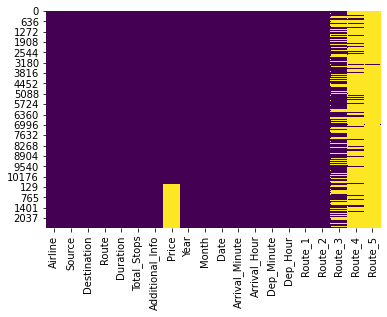

In [143]:
sns.heatmap(big_df.isnull(),cmap='viridis',cbar=False)

In [144]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [149]:
big_df['Route_1'].fillna('None',inplace=True)
big_df['Route_2'].fillna('None',inplace=True)
big_df['Route_3'].fillna('None',inplace=True)
big_df['Route_4'].fillna('None',inplace=True)
big_df['Route_5'].fillna('None',inplace=True)

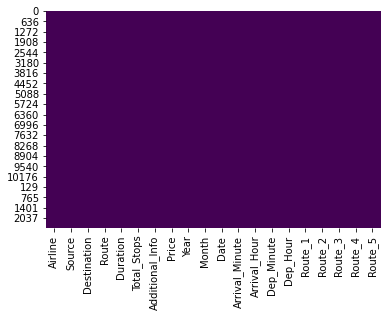

In [150]:
sns.heatmap(big_df.isnull(),cmap='viridis',cbar=False)

In [152]:
big_df.drop(['Route','Duration'],axis=1,inplace=True)

In [153]:
big_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_Minute,Arrival_Hour,Dep_Minute,Dep_Hour,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,2019,3,24,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,2019,1,1,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,2019,9,9,4,25,9,25,DEL,LKO,BOM,COK,None


In [154]:
big_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Year               0
Month              0
Date               0
Arrival_Minute     0
Arrival_Hour       0
Dep_Minute         0
Dep_Hour           0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [155]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [156]:
big_df['Airline'] = encoder.fit_transform(big_df['Airline'])
big_df['Source'] = encoder.fit_transform(big_df['Source'])
big_df['Destination'] = encoder.fit_transform(big_df['Destination'])
big_df['Additional_Info'] = encoder.fit_transform(big_df['Additional_Info'])
big_df['Route_1'] = encoder.fit_transform(big_df['Route_1'])
big_df['Route_2'] = encoder.fit_transform(big_df['Route_2'])
big_df['Route_3'] = encoder.fit_transform(big_df['Route_3'])
big_df['Route_4'] = encoder.fit_transform(big_df['Route_4'])
big_df['Route_5'] = encoder.fit_transform(big_df['Route_5'])

In [157]:
big_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year,Month,Date,Arrival_Minute,Arrival_Hour,Dep_Minute,Dep_Hour,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,2019,3,24,1,10,22,20,0,13,24,12,4
1,1,3,0,2,8,7662.0,2019,1,1,13,15,5,50,2,25,1,3,4
2,4,2,1,2,8,13882.0,2019,9,9,4,25,9,25,3,32,4,5,4


In [158]:
big_df.dtypes

Airline              int64
Source               int64
Destination          int64
Total_Stops          int64
Additional_Info      int64
Price              float64
Year                 int64
Month                int64
Date                 int64
Arrival_Minute       int64
Arrival_Hour         int64
Dep_Minute           int64
Dep_Hour             int64
Route_1              int64
Route_2              int64
Route_3              int64
Route_4              int64
Route_5              int64
dtype: object

###**Feature Selection**

In [159]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [160]:
df_train = big_df[0:10683]
df_test = big_df[10683:]

In [161]:
X = df_train.drop('Price',axis=1)
y = df_train['Price']

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [163]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [164]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [165]:
model.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [167]:
selected_features = X_train.columns[(model.get_support())]

In [168]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Month', 'Date', 'Arrival_Minute', 'Arrival_Hour', 'Dep_Minute',
       'Dep_Hour', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [170]:
X_train.drop(['Year'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [171]:
X_test.drop(['Year'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


###**Model Creation**

In [173]:
from sklearn.model_selection import RandomizedSearchCV

In [189]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=30,num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [198]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth': max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [199]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [200]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid, scoring = 'neg_mean_squared_error', n_iter=50, cv = 5, verbose=2, random_state=0 )

In [201]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   7.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.2s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   7.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   7.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   7.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=   7.1s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=500, min_samples_split=10

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 23.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [202]:
y_pred = rf_random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


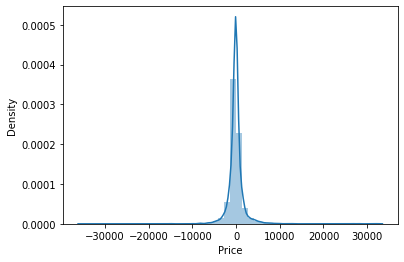

In [203]:
sns.distplot(y_test-y_pred)

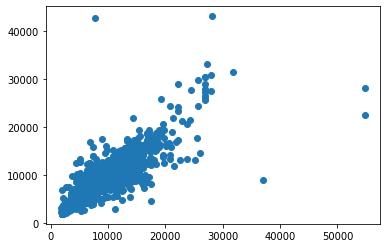

In [206]:
plt.scatter(y_test,y_pred)

In [211]:
import pickle
my_model = open('my_model.pkl','wb')
pickle.dump(rf_random,my_model)
my_model.close

<function BufferedWriter.close>